In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import time
import sampler
import display
import pprint

# Goal 1

In [24]:
def HouseholdDecomp(B):
    """
    inputs:
    B: np.array
        n x k matrix to be factored (with k <= n)

    returns Q, R
    Q: np.array
        n x k matrix
    R: np.array 
        k x k matrix
    """
    n, k = B.shape
    assert (n >= k), "n < k, precondition violated"
    
    Q = np.eye(n)
    R = B.copy().astype(float)
    for i in range(k):
        v = R[i:n, i].copy()
        v[0] += np.sign(v[0]) * np.linalg.norm(v)
        norm_v = np.linalg.norm(v)
        if norm_v == 0:
            continue
        v = v / norm_v
        v = v[:, None]
        R[i:n,i:k] -= 2 * v @ (v.T @ R[i:n,i:k])
        Q[i:n,:] -= 2 * v @ (v.T @ Q[i:n,:])
        
    Q = Q[:k].T
    R = R[:k]
    assert (Q.shape == (n,k))
    assert (R.shape == (k,k))
    return Q, R

## Householder Correctness

In [3]:
def HouseholdTest(samples = 1000, tolerance = 1e-7):
    errors = 0
    for i in range(samples):
        A, (m,n) = sampler.r_mat_range(5, 50, 5, 50)
        if (m < n):
            A = A.T
        Q, R = HouseholdDecomp(A)
        if not np.allclose(Q @ R, A, atol=tolerance):
            errors += 1
    return errors

In [4]:
samples = 1000
print (f'Error percentage: {HouseholdTest(samples) / samples}')

Error percentage: 0.0


## Householder Scaling Analysis

### Scaling on random $m\times n$ matrices, $m\geq n$.

In [5]:
def compute_household_random(ns):
    times = []
    # every two is m,n pair
    _ns = []
    for m,n in zip(*[iter(ns)]*2):
        A = None
        if m > n:
            A = sampler.r_mat(m, n)
        else:
            A = sampler.r_mat(n, m)
        start = time.perf_counter_ns()
        Q, R = HouseholdDecomp(A)
        end = time.perf_counter_ns()
        times.append(end - start)
        _ns.append(m * n * n)

    return _ns, times, (Q,R)

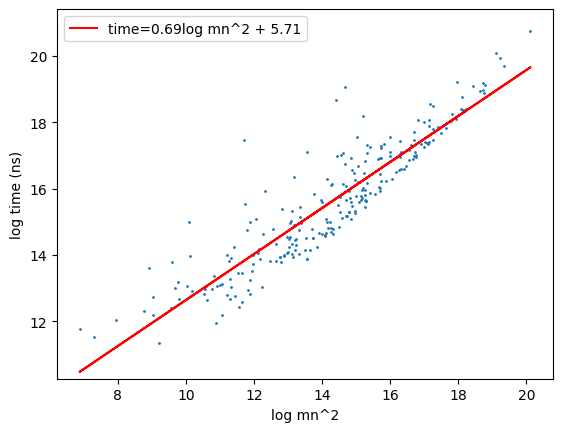

In [6]:
display.display(n_lo=5, n_hi=200, compute=compute_household_random, sampler="Exp", samples=500,axx_name="log mn^2", axy_name="log time (ns)", scientific=False)


### Scaling on random tall skinny $10n\times n$ matrices

In [27]:
def compute_household_skinny(ns):
    times = []
    _ns = []
    for n in ns:
        A = sampler.r_mat(10 * n, n)
        start = time.perf_counter_ns()
        Q, R = HouseholdDecomp(A)
        end = time.perf_counter_ns()
        times.append(end - start)
        _ns.append(10 * n * n * n)

    return _ns, times, (Q,R)

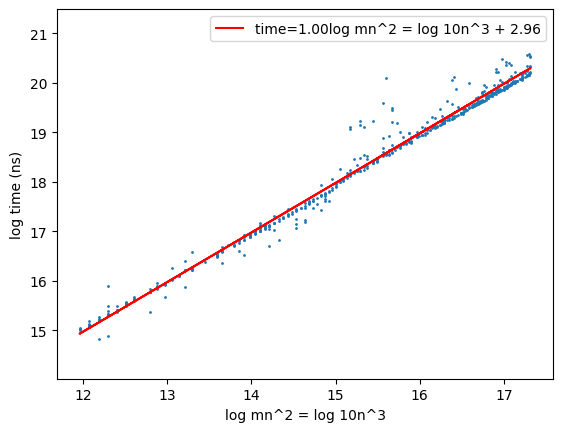

In [28]:
display.display(n_lo=25, n_hi=150, compute=compute_household_skinny, samples=500,axx_name="log mn^2 = log 10n^3", axy_name="log time (ns)", scientific=False)


### Scaling on random square $n\times n$ matrices

In [9]:
def compute_household_square(ns):
    times = []
    # every two is m,n pair
    for n in ns:
        A = sampler.r_square_mat(n)
        start = time.perf_counter_ns()
        Q, R = HouseholdDecomp(A)
        end = time.perf_counter_ns()
        times.append(end - start)

    return ns, times, (Q,R)

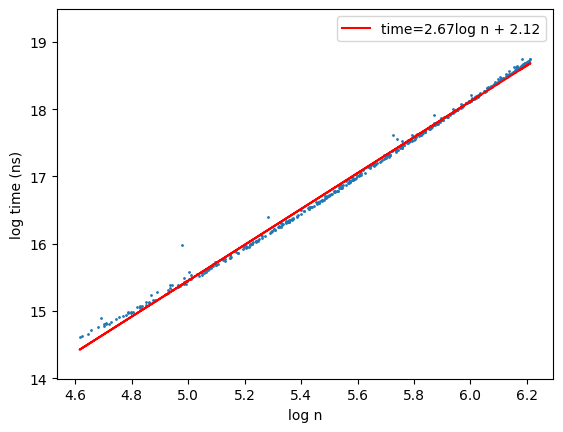

In [16]:
display.display(n_lo=100, n_hi=500, compute=compute_household_square, samples=500,axx_name="log n", axy_name="log time (ns)", scientific=False)

# Goal 2

# Goal 3

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

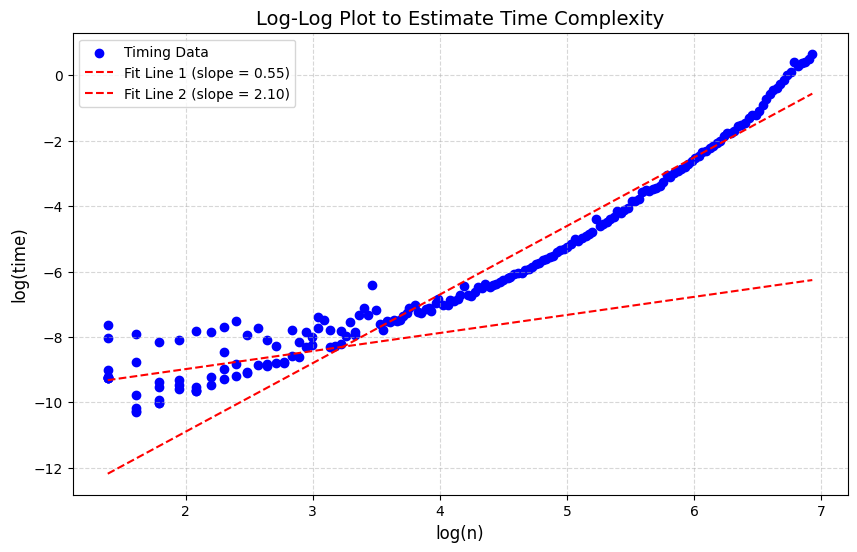

In [204]:
## Goal 1: Testing
test_range = np.logspace(2, 10, num=200, base=2,dtype=int)
times = []

for n in test_range:
    B = np.random.rand(n, n-2)
    
    start_time = time.time()
    Householder_QR_Factorization(B)
    end_time = time.time()
    times.append(end_time - start_time)

# Log-transform the data
log_n = np.log(test_range)
log_time = np.log(times)

# Perform linear regression to estimate slope
slope1, intercept1, r_value1, _, _ = scipy.stats.linregress(log_n[:50], log_time[:50])
slope2, intercept2, r_value2, _, _ = scipy.stats.linregress(log_n[50:], log_time[50:])

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(log_n, log_time, label='Timing Data', color='blue')
plt.plot(log_n, intercept1 + slope1 * log_n, label=f'Fit Line 1 (slope = {slope1:.2f})', linestyle='--', color='red')
plt.plot(log_n, intercept2 + slope2 * log_n, label=f'Fit Line 2 (slope = {slope2:.2f})', linestyle='--', color='red')

plt.xlabel('log(n)', fontsize=12)
plt.ylabel('log(time)', fontsize=12)
plt.title('Log-Log Plot to Estimate Time Complexity', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()